In [1]:
import requests
import pprint
import json
import os
import math
import time
import pandas as pd
import numpy as np
import geopandas as gpd
import pyproj
import folium
import matplotlib.pyplot as plt

from shapely.geometry import mapping, shape, Point, Polygon, LineString
from folium import plugins
from folium.plugins import MarkerCluster, HeatMap

In [2]:
def get_access_token(consumer_key, consumer_secret) -> None :
    temp_res = requests.get(
        url="https://sgisapi.kostat.go.kr/OpenAPI3/auth/authentication.json",
        params={
            "consumer_key": consumer_key,
            "consumer_secret": consumer_secret
        }
    )

    access_token = temp_res.json()["result"]["accessToken"]

    return access_token


consumer_key = "0557bd5252b34142911d"
consumer_secret = "d90d86911924440786d4"

print('access token: ', get_access_token(consumer_key, consumer_secret))

access token:  f4845d61-c63c-4e37-a633-35ae28f5309b


In [3]:
def get_features_json(access_token, si_code) -> None:
    url="https://sgisapi.kostat.go.kr/OpenAPI3/boundary/hadmarea.geojson"
    params={
        "accessToken": access_token,
        "year": 2019, # 데이터 기준연도 범위: 2000 ~ 2019 / 2019가 가장 최근 데이터
        "adm_cd": si_code, # 행정구역코드
        "low_search": 0 # 행정구역코드에 해당하는 정보만 요청: 0, 1단계 하위 행정구역 정보 요청: 1, 2단계 하위 행정구역 정보 요청: 2
    }

    temp_features_json = requests.get(
        url=url,
        params=params
    ).json()["features"]

    return temp_features_json

# 대구시 행정경계 데이터로 대구시 시각화

In [4]:
access_token = get_access_token(consumer_key, consumer_secret)

In [33]:
# 대구시 행정경계 데이터를 json으로 가져오기
temp_features_json = get_features_json(access_token, 22)

In [34]:
# 대구시 행정경계 데이터의 geometry 읽어오기
temp_shape_data = temp_features_json[0]["geometry"]

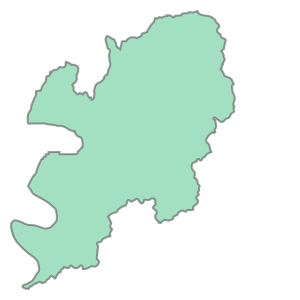

In [35]:
# shape라이브러리의 shapley 메서드로 json geometry 읽어와서 시각화 하기
temp_shape = shape(temp_shape_data)
temp_shape

# 코로나19 예방접종센터 시각화 실습

In [36]:
def get_vaccination_center(serviceKey):
    temp_res = requests.get(
        url="https://api.odcloud.kr/api/15077586/v1/centers",
        params={
            "serviceKey": serviceKey
        }
    )

    temp_df = pd.DataFrame(temp_res.json()["data"])

    return temp_df

serviceKey = "LzlBj0p3GnSdSwbZEDsfDJQF13YfSF6S0kxSCOSFap8Vq20jZkVrVykaQ/PQH9CyukrUWhsmA8T85RHFeaz3rg=="
vaccination_center_df = get_vaccination_center(serviceKey)
vaccination_center_df

,address,centerName,centerType,createdAt,facilityName,id,lat,lng,org,phoneNumber,sido,sigungu,updatedAt,zipCode
0,서울특별시 중구 을지로 39길 29,코로나19 중앙 예방접종센터,중앙/권역,2021-03-03 07:00:52,국립중앙의료원 D동,1,37.567817,127.004501,국립중앙의료원,02-2260-7114,서울특별시,중구,2021-07-16 04:55:08,04562
1,충청남도 천안시 동남구 천안대로 357,코로나19 중부권역 예방접종센터,중앙/권역,2021-03-03 07:00:52,천안시 실내배드민턴장 1층,2,36.779887,127.164717,순천향대 천안병원,,충청남도,천안시 동남구,2021-07-16 04:55:08,31212
2,광주광역시 동구 필문대로 365,코로나19 호남권역 예방접종센터,중앙/권역,2021-03-03 07:00:52,조선대학교병원 의성관 5층,3,35.139465,126.925563,조선대병원,062-220-3739,광주광역시,동구,2021-07-16 04:55:08,61452
3,경상남도 양산시 물금읍 금오로 20,코로나19 영남권역 예방접종센터,중앙/권역,2021-03-03 07:00:53,양산 부산대병원 기숙사동 1층,4,35.3239,129.009337,양산 부산대병원,055-360-6701,경상남도,양산시,2021-07-16 04:55:08,50612
4,대구시 중구 달성로 56,코로나19 대구광역시 중구 예방접종센터,지역,2021-03-03 07:00:53,계명대학교 대구동산병원 별관,5,35.869985,128.583716,,053-661-3955,대구광역시,중구,2021-07-16 04:55:09,41931
5,서울특별시 성동구 고산자로 270,코로나19 서울특별시 성동구 예방접종센터,지역,2021-03-15 00:03:43,성동구청 대강당(3층),6,37.563457,127.036981,,02-2286-5084,서울특별시,성동구,2021-07-16 04:55:09,04750
6,부산 부산진구 시민공원로 73,코로나19 부산광역시 부산진구 예방접종센터,지역,2021-03-15 00:03:43,부산시민공원 시민사랑채,7,35.170182,129.059301,,051-605-8633,부산광역시,부산진구,2021-07-16 04:55:09,47197
7,인천광역시 연수구 경원대로 526,코로나19 인천광역시 연수구 예방접종센터,지역,2021-03-15 00:03:43,선학경기장 선학체육관,8,37.429571,126.703271,,032-749-8121,인천광역시,연수구,2021-07-16 04:55:10,21908
8,광주광역시 서구 금화로 278,코로나19 광주광역시 서구 예방접종센터,지역,2021-03-15 00:03:43,빛고을체육관,9,35.135361,126.8771731,,062-371-8731,광주광역시,서구,2021-07-16 04:55:10,62048
9,대전광역시 유성구 유성대로 978,코로나19 대전광역시 유성구 예방접종센터,지역,2021-03-15 00:03:44,유성종합스포츠센터,10,36.378512,127.344399,,042-611-2498,대전광역시,유성구,2021-07-16 04:55:11,34128


In [37]:
vaccination_center_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       10 non-null     object
 1   centerName    10 non-null     object
 2   centerType    10 non-null     object
 3   createdAt     10 non-null     object
 4   facilityName  10 non-null     object
 5   id            10 non-null     int64 
 6   lat           10 non-null     object
 7   lng           10 non-null     object
 8   org           10 non-null     object
 9   phoneNumber   10 non-null     object
 10  sido          10 non-null     object
 11  sigungu       10 non-null     object
 12  updatedAt     10 non-null     object
 13  zipCode       10 non-null     object
dtypes: int64(1), object(13)
memory usage: 1.2+ KB


In [38]:
vaccination_center_df['lat'] = vaccination_center_df['lat'].astype(float)
vaccination_center_df['lng'] = vaccination_center_df['lng'].astype(float)
vaccination_center_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       10 non-null     object 
 1   centerName    10 non-null     object 
 2   centerType    10 non-null     object 
 3   createdAt     10 non-null     object 
 4   facilityName  10 non-null     object 
 5   id            10 non-null     int64  
 6   lat           10 non-null     float64
 7   lng           10 non-null     float64
 8   org           10 non-null     object 
 9   phoneNumber   10 non-null     object 
 10  sido          10 non-null     object 
 11  sigungu       10 non-null     object 
 12  updatedAt     10 non-null     object 
 13  zipCode       10 non-null     object 
dtypes: float64(2), int64(1), object(11)
memory usage: 1.2+ KB


In [39]:
# 데이터의 위/경도 데이터로 Geometry Point객체를 생성해서 Geometry 컬럼 생성
vaccination_center_df['geometry'] = vaccination_center_df.apply(lambda row: Point([row['lng'], row['lat']]), axis=1)

In [40]:
# Geopandas DataFrame으로 DataFrame 생성
vaccination_center_gpd_df = gpd.GeoDataFrame(vaccination_center_df, geometry="geometry")
vaccination_center_gpd_df

,address,centerName,centerType,createdAt,facilityName,id,lat,lng,org,phoneNumber,sido,sigungu,updatedAt,zipCode,geometry
0,서울특별시 중구 을지로 39길 29,코로나19 중앙 예방접종센터,중앙/권역,2021-03-03 07:00:52,국립중앙의료원 D동,1,37.567817,127.004501,국립중앙의료원,02-2260-7114,서울특별시,중구,2021-07-16 04:55:08,04562,POINT (127.00450 37.56782)
1,충청남도 천안시 동남구 천안대로 357,코로나19 중부권역 예방접종센터,중앙/권역,2021-03-03 07:00:52,천안시 실내배드민턴장 1층,2,36.779887,127.164717,순천향대 천안병원,,충청남도,천안시 동남구,2021-07-16 04:55:08,31212,POINT (127.16472 36.77989)
2,광주광역시 동구 필문대로 365,코로나19 호남권역 예방접종센터,중앙/권역,2021-03-03 07:00:52,조선대학교병원 의성관 5층,3,35.139465,126.925563,조선대병원,062-220-3739,광주광역시,동구,2021-07-16 04:55:08,61452,POINT (126.92556 35.13947)
3,경상남도 양산시 물금읍 금오로 20,코로나19 영남권역 예방접종센터,중앙/권역,2021-03-03 07:00:53,양산 부산대병원 기숙사동 1층,4,35.323900,129.009337,양산 부산대병원,055-360-6701,경상남도,양산시,2021-07-16 04:55:08,50612,POINT (129.00934 35.32390)
4,대구시 중구 달성로 56,코로나19 대구광역시 중구 예방접종센터,지역,2021-03-03 07:00:53,계명대학교 대구동산병원 별관,5,35.869985,128.583716,,053-661-3955,대구광역시,중구,2021-07-16 04:55:09,41931,POINT (128.58372 35.86998)
5,서울특별시 성동구 고산자로 270,코로나19 서울특별시 성동구 예방접종센터,지역,2021-03-15 00:03:43,성동구청 대강당(3층),6,37.563457,127.036981,,02-2286-5084,서울특별시,성동구,2021-07-16 04:55:09,04750,POINT (127.03698 37.56346)
6,부산 부산진구 시민공원로 73,코로나19 부산광역시 부산진구 예방접종센터,지역,2021-03-15 00:03:43,부산시민공원 시민사랑채,7,35.170182,129.059301,,051-605-8633,부산광역시,부산진구,2021-07-16 04:55:09,47197,POINT (129.05930 35.17018)
7,인천광역시 연수구 경원대로 526,코로나19 인천광역시 연수구 예방접종센터,지역,2021-03-15 00:03:43,선학경기장 선학체육관,8,37.429571,126.703271,,032-749-8121,인천광역시,연수구,2021-07-16 04:55:10,21908,POINT (126.70327 37.42957)
8,광주광역시 서구 금화로 278,코로나19 광주광역시 서구 예방접종센터,지역,2021-03-15 00:03:43,빛고을체육관,9,35.135361,126.877173,,062-371-8731,광주광역시,서구,2021-07-16 04:55:10,62048,POINT (126.87717 35.13536)
9,대전광역시 유성구 유성대로 978,코로나19 대전광역시 유성구 예방접종센터,지역,2021-03-15 00:03:44,유성종합스포츠센터,10,36.378512,127.344399,,042-611-2498,대전광역시,유성구,2021-07-16 04:55:11,34128,POINT (127.34440 36.37851)


In [41]:
vaccination_center_gpd_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   address       10 non-null     object  
 1   centerName    10 non-null     object  
 2   centerType    10 non-null     object  
 3   createdAt     10 non-null     object  
 4   facilityName  10 non-null     object  
 5   id            10 non-null     int64   
 6   lat           10 non-null     float64 
 7   lng           10 non-null     float64 
 8   org           10 non-null     object  
 9   phoneNumber   10 non-null     object  
 10  sido          10 non-null     object  
 11  sigungu       10 non-null     object  
 12  updatedAt     10 non-null     object  
 13  zipCode       10 non-null     object  
 14  geometry      10 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(11)
memory usage: 1.3+ KB


In [42]:
# 좌표계 정의 (EPSG코드 wgs84 는 epsg:4326)
vaccination_center_gpd_df.crs = {"init": "epsg:4326"}
vaccination_center_gpd_df.crs

C:\Users\김영준\PycharmProjects\aiffel_study\venv\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

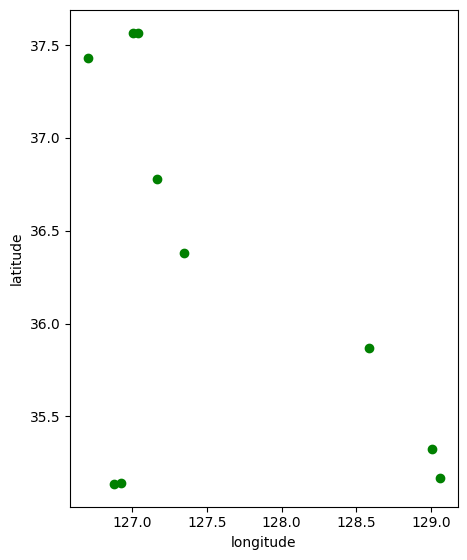

In [46]:
plt.rcParams['figure.figsize']=(5,10)
vaccination_center_gpd_df.plot(color="green", label="vaccination_center")
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [48]:
daegu_line_geo_df = gpd.read_file('Z_KAIS_TL_SPRD_MANAGE_27000.shp',encoding='cp949')
daegu_line_geo_df.head()

,ALWNC_DE,ALWNC_RESN,BSI_INT,ENG_RN,MVMN_DE,MVMN_RESN,MVM_RES_CD,NTFC_DE,OPERT_DE,RBP_CN,...,RDS_MAN_NO,REP_CN,RN,RN_CD,ROAD_BT,ROAD_LT,ROA_CLS_SE,SIG_CD,WDR_RD_CD,geometry
0,20091203,대구의 중앙을 남북으로 가로지르는 도로,20,Jungang-daero,20141031,"광역도로 정비 및 부여사유, 부여방식 정비",90,20091210,20141031021735,남산동 2110-6대,...,961,태평로1가 44철,중앙대로,2007001,40.0,6243.0,2,27110,2,"LINESTRING (343791.016 263624.988, 343771.090 ..."
1,20091203,대구의 중앙을 남북으로 가로지르는 도로,20,Jungang-daero,20141031,"광역도로 정비 및 부여사유, 부여방식 정비",90,20091210,20141031021733,남산동 2110-6대,...,1257,태평로1가 44철,중앙대로,2007001,2.0,6243.0,2,27110,2,"LINESTRING (343919.953 263642.885, 343920.674 ..."
2,20091203,대구의 중앙을 남북으로 가로지르는 도로,20,Jungang-daero,20141031,"광역도로 정비 및 부여사유, 부여방식 정비",90,20091210,20141031021733,남산동 2110-6대,...,1258,태평로1가 44철,중앙대로,2007001,2.0,6243.0,2,27110,2,"LINESTRING (343933.819 263645.986, 343933.848 ..."
3,20091203,대구의 중앙을 남북으로 가로지르는 도로,20,Jungang-daero,20141031,"광역도로 정비 및 부여사유, 부여방식 정비",90,20091210,20141031021736,남산동 2110-6대,...,619,태평로1가 44철,중앙대로,2007001,40.0,6243.0,2,27110,2,"LINESTRING (343943.146 264771.702, 343956.645 ..."
4,20091203,대구의 중앙을 남북으로 가로지르는 도로,20,Jungang-daero,20141031,"광역도로 정비 및 부여사유, 부여방식 정비",90,20091210,20141031021734,남산동 2110-6대,...,629,태평로1가 44철,중앙대로,2007001,40.0,6243.0,2,27110,2,"LINESTRING (343938.263 264700.896, 343949.360 ..."


In [49]:
daegu_line_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26160 entries, 0 to 26159
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ALWNC_DE    26160 non-null  object  
 1   ALWNC_RESN  26160 non-null  object  
 2   BSI_INT     26160 non-null  object  
 3   ENG_RN      26160 non-null  object  
 4   MVMN_DE     26160 non-null  object  
 5   MVMN_RESN   25059 non-null  object  
 6   MVM_RES_CD  25652 non-null  object  
 7   NTFC_DE     26160 non-null  object  
 8   OPERT_DE    26160 non-null  object  
 9   RBP_CN      26160 non-null  object  
 10  RDS_DPN_SE  26160 non-null  object  
 11  RDS_MAN_NO  26160 non-null  int64   
 12  REP_CN      26160 non-null  object  
 13  RN          26160 non-null  object  
 14  RN_CD       26160 non-null  object  
 15  ROAD_BT     26160 non-null  float64 
 16  ROAD_LT     26160 non-null  float64 
 17  ROA_CLS_SE  26160 non-null  object  
 18  SIG_CD      26160 non-null  object  
 

<Axes: >

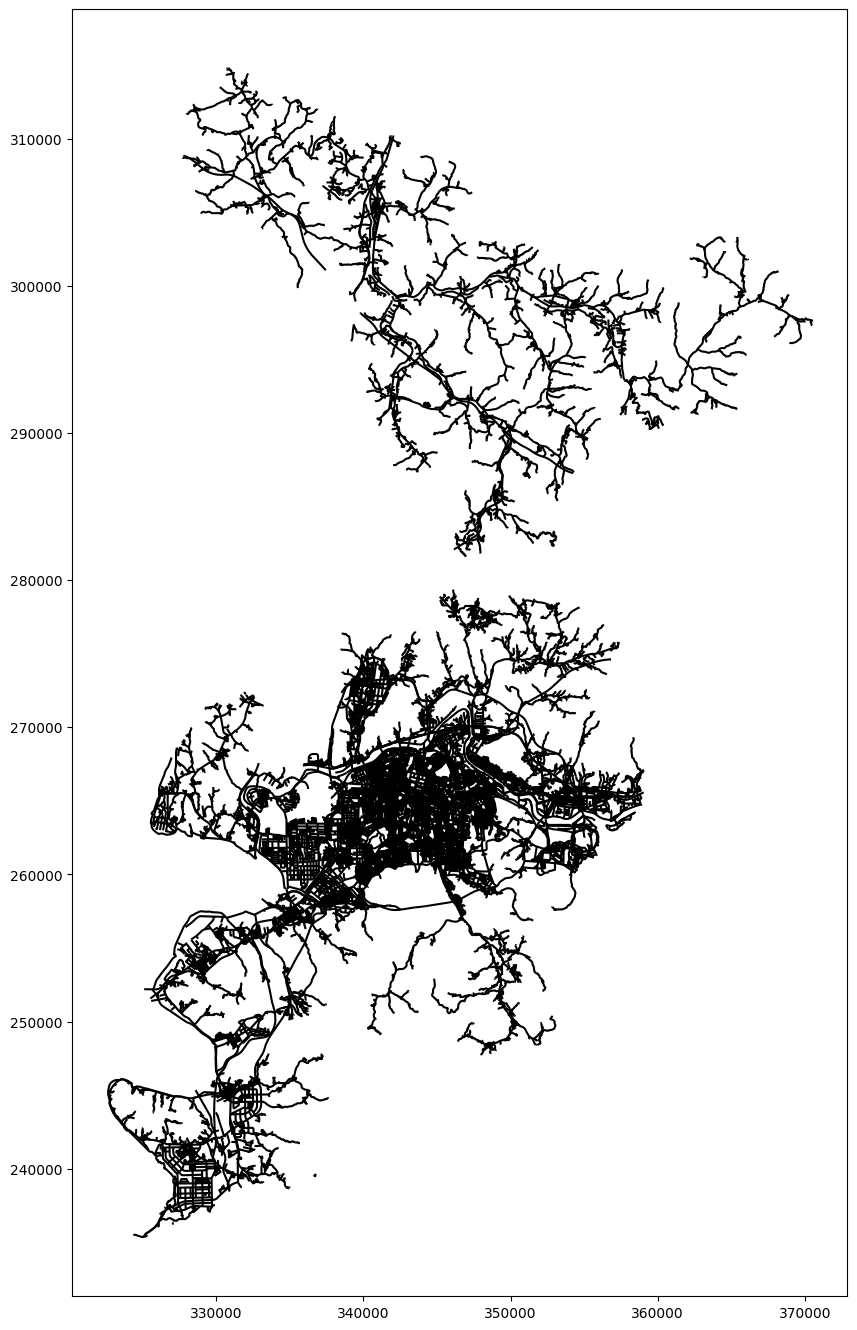

In [50]:
plt.rcParams['figure.figsize']=(10,20)
daegu_line_geo_df.plot(color='black')